In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

# Canny边缘检测

## 噪声去除
由于边缘检测很容易受到噪声影响，所以Canny边缘检测第一步是使用5x5的高斯滤波器来去除噪声。

## 计算图像梯度
对平滑后的图像使用Sobel算子计算水平方向和竖直方向的一阶导数$G_x$和$G_y$，根据$G_x$和$G_y$找到边界的梯度和方向，公式如下：

$$Gradient=\sqrt{G_x^2+G_y^2}$$

$$Angle=\tan^-1{\frac{G_x}{G_y}}$$

梯度的方向一半总是与边界垂直，被归为四类：垂直，水平和两个对角线。

## 非极大值抑制
在获得梯度的方向和大小之后，应该对整幅图像做一个扫描，去除那些非边界上的点。对每一个像素进行检查，看这个点的梯度是不是周围具有相同梯度方向的点中最大的。

## 滞后阈值
现在要确定哪些边界才是真正的边界。通过阈值minVal和maxVal确定边界，当图像的灰度梯度高于maxVal时被认为是真正的边界，那些低于minVal的边界会被抛弃，如果介于两者之间的话，如果改点与某个被确定为整整的边界点相连，那么也认为是边界点，否则抛弃。

In [2]:
# cv2.Canny?

In [3]:
def bgr_to_rgb(bgr):
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return rgb
def rgb_to_bgr(rgb):
    bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
    return bgr

Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
其中threshold1是滞后阈值minVal，threshold2是滞后阈值maxVal，apertureSize用来计算图像梯度的Sobel卷积核的大小，默认值为3，最后一个参数是L2gradient，用来设定求梯度大小的方程，设置为True，则使用$Gradient=\sqrt{G_x^2+G_y^2}$计算梯度大小，否则使用$Gradient={G_x^2+G_y^2}$代替，默认值为False。

In [4]:
img_src_bgr = cv2.imread('../../data/lena.jpg')

In [5]:
img_dst_bgr = cv2.Canny(img_src_bgr, threshold1=100, threshold2=200)

In [6]:
img_dst_bgr.shape

(512, 512)

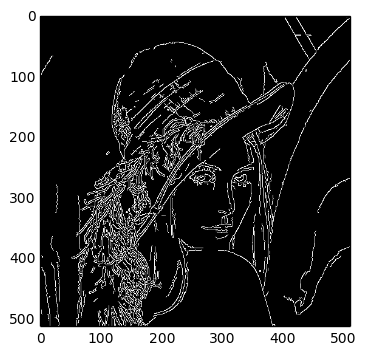

In [7]:
plt.imshow(img_dst_bgr, cmap='gray')